In [2]:
import scanpy as sc
import pandas as pd
import numpy as np
import json
import geopandas as gpd
from shapely.geometry import Polygon, LineString
import matplotlib.pyplot as plt
from shapely import wkb
import csv

# Cell Clusters

In [5]:
# h5 = sc.read_h5ad("./A_50p_E1_with_imputation.h5ad")
# h5 = sc.read_h5ad("../75pe/B_75p_E1_with_imputation.h5ad")
h5 = sc.read_h5ad("../6s/C_6s_E1_with_imputation_rescaled_z.h5ad")


In [6]:
h5.obs

,global_z,global_x,global_y,cellvol,batch,cell_id,blank_ct,n_counts,n_genes,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,leiden,clusters,germlayer,type,tissue
cid,,,,,,,,,,,,,,,,,,
E1_2.0,31.254280,12413.649968,2616.843373,201856.0,E1,2.0,160,1890,262,262,5.572154,2596.502854,7.862306,63,Epidermis,Ectoderm,Non-neural Ectoderm,Epidermis
E1_3.0,27.925608,8535.404864,5243.259895,134208.0,E1,3.0,38,719,191,191,5.257495,1485.659037,7.304287,10,Neural Crest,Ectoderm,Neural Ectoderm,Neural Crest
E1_4.0,61.740930,9419.744961,3965.230314,952576.0,E1,4.0,1084,11599,456,456,6.124683,3376.677439,8.124944,45,EVL/Periderm,Extraembryonic,Extraembryonic,EVL/Periderm
E1_5.0,47.252455,12338.449161,2523.417802,404096.0,E1,5.0,465,5141,385,385,5.955837,3528.025499,8.168777,15,Telencephalon Dorsal,Ectoderm,Neural Ectoderm,Telencephalon Dorsal
E1_6.0,45.482877,12414.673516,2620.398402,224256.0,E1,6.0,226,2480,294,294,5.686975,3066.735160,8.028695,15,Telencephalon Dorsal,Ectoderm,Neural Ectoderm,Telencephalon Dorsal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
E1_26103.0,284.816416,13908.867565,3082.874306,645632.0,E1,26103.0,572,6267,399,399,5.991465,2691.803232,7.898338,3,Epidermis,Ectoderm,Non-neural Ectoderm,Epidermis
E1_26105.0,294.585455,13909.671515,1964.381818,211200.0,E1,26105.0,259,2786,311,311,5.743003,3658.102424,8.204973,3,Epidermis,Ectoderm,Non-neural Ectoderm,Epidermis
E1_26106.0,291.957837,14003.042503,1603.257395,188224.0,E1,26106.0,53,661,169,169,5.135798,973.856851,6.882291,52,EVL + autofluorescence,Extraembryonic,Extraembryonic,EVL + autofluorescence


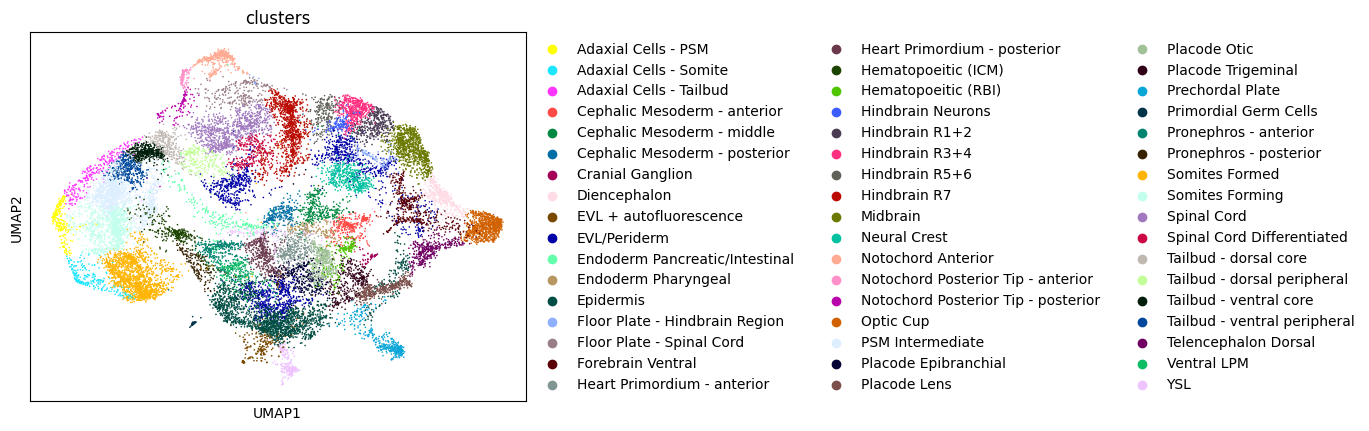

In [7]:
sc.pl.umap(h5, color="clusters")

In [9]:
h5.obs["clusters_"] = h5.obs["clusters"].apply(lambda x: "Margin Ventrolateral Posterior" if "Margin Ventrolateral Pn" in x else x)

In [21]:
iis = [x.split("_")[1].split(".")[0] for x in h5.obs.index]
vals = h5.obs['clusters_']

In [22]:
iis

['18',
 '47',
 '58',
 '194',
 '226',
 '257',
 '291',
 '295',
 '345',
 '414',
 '459',
 '509',
 '706',
 '896',
 '1004',
 '1013',
 '1038',
 '1045',
 '1176',
 '1206',
 '1252',
 '1283',
 '1284',
 '1312',
 '1313',
 '1381',
 '1382',
 '1501',
 '1525',
 '1580',
 '1603',
 '1604',
 '1614',
 '1654',
 '1670',
 '1690',
 '1748',
 '1782',
 '1784',
 '1823',
 '1843',
 '1849',
 '1881',
 '2025',
 '2135',
 '2176',
 '2200',
 '2231',
 '2235',
 '2242',
 '2282',
 '2324',
 '2378',
 '2398',
 '2408',
 '2440',
 '2488',
 '2540',
 '2569',
 '2591',
 '2592',
 '2641',
 '2670',
 '2702',
 '2718',
 '2752',
 '2773',
 '2818',
 '2838',
 '2865',
 '2917',
 '2945',
 '2974',
 '2998',
 '3007',
 '3061',
 '3114',
 '3385',
 '3386',
 '3387',
 '3389',
 '3390',
 '3391',
 '3394',
 '3395',
 '3396',
 '3400',
 '3401',
 '3402',
 '3403',
 '3404',
 '3405',
 '3420',
 '3421',
 '3423',
 '3424',
 '3426',
 '3431',
 '3432',
 '3442',
 '3444',
 '3450',
 '3458',
 '3474',
 '3485',
 '3488',
 '3494',
 '3495',
 '3504',
 '3508',
 '3513',
 '3514',
 '3517',


In [23]:
clss = {iis[i]:vals[i] for i in range(len(iis))}

/var/folders/hh/cwm3sc9j4cg9p0fjg8xlwcpm0000gn/T/ipykernel_6644/1425777656.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  clss = {iis[i]:vals[i] for i in range(len(iis))}


In [26]:
json_string = json.dumps(clss, indent=4)
# print(json_string)
with open('clusters.json', 'w') as f:
    f.write(json_string)

In [40]:
pal75 = {
    'YSL':'#FF4500','Mesoderm Ventral':'#1E90FF','Mesoderm Ventral Margin - Epiblast':'#32CD32','EVL Animal':'#FFD700','EVL Marginal':'#FF69B4','Endoderm':'#00FA9A','Ectoderm Ventral Posterior':'#FF6347','Mesoderm Somitic':'#8A2BE2','Ectoderom Dorsal Margin':'#40E0D0','Mesoderm Lateral Margin - Epiblast':'#FF8C00','Ectoderm Lateral Posterior':'#ADFF2F','Mesoderm Lateral Anterior':'#FF00FF','Ectoderm Dorsal Anterior':'#00CED1','Ectoderm Lateral Anterior':'#FF1493','Ectoderm Ventral Anterior':'#FF7F50','Primordial Germ Cells':'#1E90FF','Ectoderm Dorsal Posterior':'#FF4500','Notochord':'#32CD32','Dorsal Forerunner Cells':'#FFD700','Prechordal Plate':'#FF69B4'
}


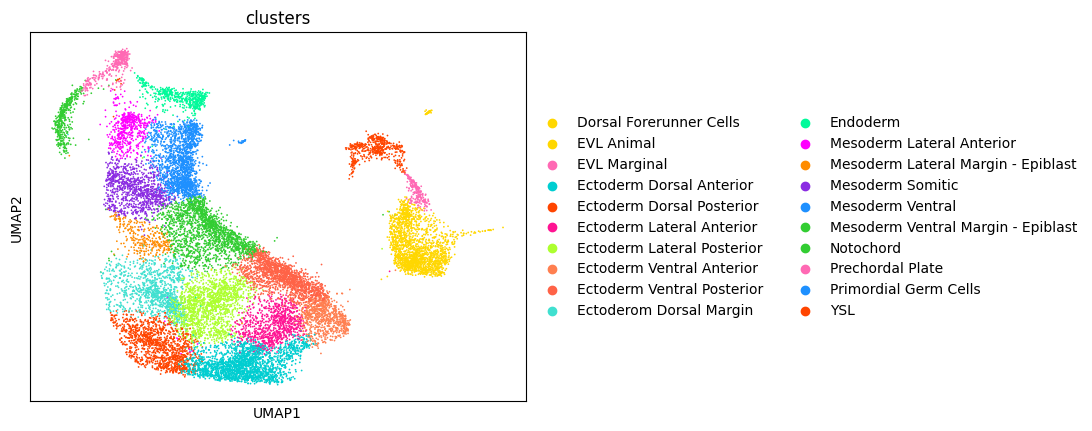

In [41]:
sc.pl.umap(h5, color="clusters", palette=pal75)

In [43]:
iis = [x.split("_")[1].split(".")[0] for x in h5.obs.index]
vals = h5.obs['clusters']
clss = {iis[i]:vals[i] for i in range(len(iis))}
json_string = json.dumps(clss, indent=4)
# print(json_string)
with open('../75pe/clusters.json', 'w') as f:
    f.write(json_string)

/var/folders/hh/cwm3sc9j4cg9p0fjg8xlwcpm0000gn/T/ipykernel_6644/968606592.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  clss = {iis[i]:vals[i] for i in range(len(iis))}


In [8]:
pal6s = {
        'Epidermis':'#FF5733','Neural Crest':'#33FF57','EVL/Periderm':'#3357FF','Telencephalon Dorsal':'#FF33A1','Hindbrain R5+6':'#FFEC33','Hindbrain R3+4':'#FFD700','Hindbrain R1+2':'#FF9633','EVL + autofluorescence':'#33FFC5','Hindbrain R7':'#5733FF','Placode Otic':'#FF33E1','Heart Primordium - anterior':'#33FF8A','Midbrain':'#6E33FF','Cephalic Mesoderm - middle':'#FF6E33','Placode Lens':'#33FFE1','Spinal Cord':'#A133FF','YSL':'#FF336E','Diencephalon':'#33FFD7','Pronephros - posterior':'#A6FF33','Tailbud - dorsal peripheral':'#FFEB3B','Tailbud - dorsal core':'#FF33B2','Notochord Posterior Tip - posterior':'#FFCC33','PSM Intermediate':'#FF337C','Pronephros - anterior':'#FFF033','Spinal Cord Differentiated':'#D733FF','Somites Formed':'#FF33C8','Placode Epibranchial':'#33FFB2','Cranial Ganglion':'#D1FF33','Ventral LPM':'#FF3372','Tailbud - ventral core':'#33FFC8','Floor Plate - Spinal Cord':'#C833FF','Hindbrain Neurons':'#FF337A','Placode Trigeminal':'#33FFA8','Optic Cup':'#D833FF','Hematopoeitic (ICM)':'#FF33CC','Somites Forming':'#33FF85','Heart Primordium - posterior':'#E133FF','Tailbud - ventral peripheral':'#FF338F','Adaxial Cells - Tailbud':'#33FF97','Prechordal Plate':'#B833FF','Primordial Germ Cells':'#FF33D9','Forebrain Ventral':'#33FF6E','Endoderm Pancreatic/Intestinal':'#8D33FF','Hematopoeitic (RBI)':'#FF33A8','Cephalic Mesoderm - anterior':'#FFFF33','Adaxial Cells - Somite':'#A833FF','Notochord Posterior Tip - anterior':'#FF337F','Adaxial Cells - PSM':'#33FFB9','Cephalic Mesoderm - posterior':'#FFAE33','Endoderm Pharyngeal':'#FF9633','Notochord Anterior':'#FF3396','Floor Plate - Hindbrain Region':'#33FF73'
}

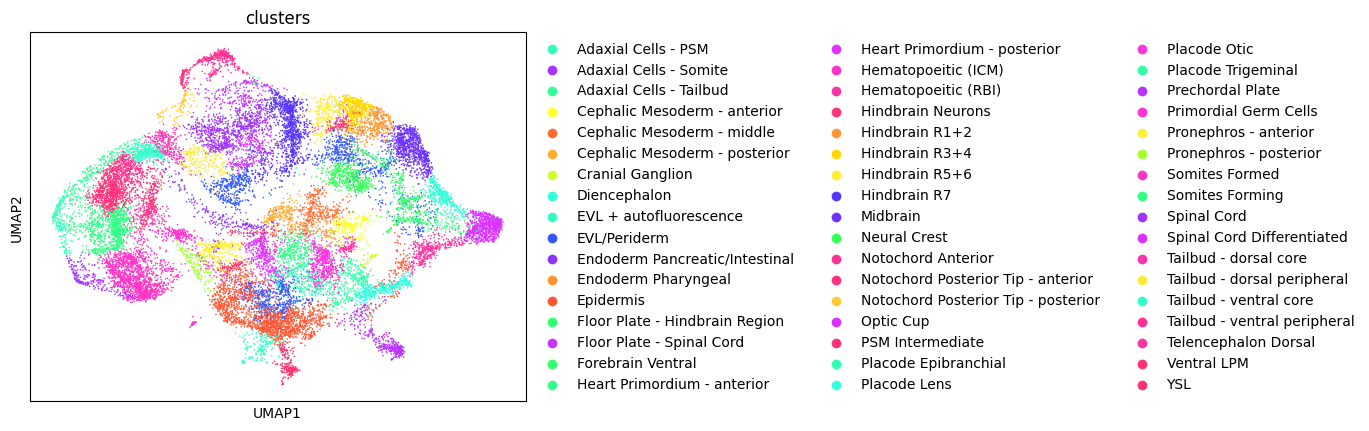

In [9]:
sc.pl.umap(h5, color="clusters", palette=pal6s)

In [10]:
iis = [x.split("_")[1].split(".")[0] for x in h5.obs.index]
vals = h5.obs['clusters']
clss = {iis[i]:vals[i] for i in range(len(iis))}
json_string = json.dumps(clss, indent=4)
# print(json_string)
with open('../6s/clusters.json', 'w') as f:
    f.write(json_string)

/var/folders/hh/cwm3sc9j4cg9p0fjg8xlwcpm0000gn/T/ipykernel_17003/182895481.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  clss = {iis[i]:vals[i] for i in range(len(iis))}


In [10]:
pal = {
    'Animal Dorsal':'#006308',
    'Animal Ventral':'#1E90FF',
    'EVL Animal':'#32CD32',
    'EVL Margin':'#FFD700',
    'Margin Dorsal':'#FF6347',
    'Margin Ventrolateral Anterior':'#FF1493',
    'Margin Ventrolateral Posterior':'#40E0D0',
    'YSL':'#8A2BE2'
}

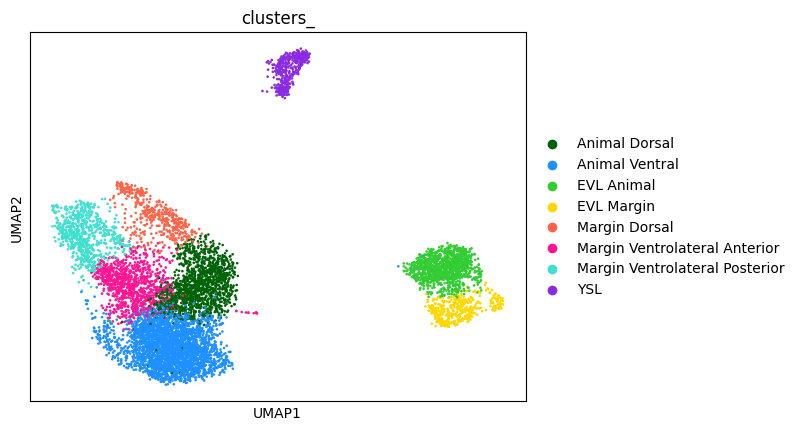

In [11]:
sc.pl.umap(h5, color="clusters_", palette=pal)

# Cell nuclei

In [17]:
# df = pd.read_pickle("../50pe/contours/A_50p_E1_contours_nuclei/contours_nuclei_z_54.pkl")
# df

In [18]:
# import matplotlib.pyplot as plt
# import numpy as np


# cell_boundaries = df
# # Plot cell boundaries
# plt.figure(figsize=(6, 6))
# it = 0
# for cell_id, points in cell_boundaries.items():
#     if it > 10:
#         break
#     points = np.array(points)
#     if points.shape[0] > 1:  # Ensure there are enough points to plot
#         plt.plot(points[:, 0], points[:, 1], marker='o', label=f'Cell {cell_id}', linewidth=0.1, markersize=0.5)
#     it += 1

# plt.xlabel("X Coordinate")
# plt.ylabel("Y Coordinate")
# plt.title("Cell Boundaries")
# plt.grid(True)
# plt.axis('equal')
# plt.show()


In [ ]:
import pandas as pd
import json
import gzip
import os

# Create output directories if they don't exist
# os.makedirs("./contours_processed_uncompressed", exist_ok=True)
# os.makedirs("./contours_processed_compressed", exist_ok=True)

for layer in range(0, 60):
    # Load the pickle file
    if layer < 10:
        df = pd.read_pickle(f"../50pe/contours/A_50p_E1_contours_nuclei/contours_nuclei_z_0{layer}.pkl")
    else:
        df = pd.read_pickle(f"../50pe/contours/A_50p_E1_contours_nuclei/contours_nuclei_z_{layer}.pkl")

    # Flatten the data
    points = []
    cell_offsets = []
    cell_ids = []
    offset = 0

    for cell_id, boundary in df.items():
        cell_ids.append(str(cell_id))
        cell_offsets.append(offset)
        flat_boundary = [coord for xy in boundary for coord in xy]  # flatten [x, y] pairs
        points.extend(flat_boundary)
        offset += len(boundary)  # number of coordinate pairs

    # Structure the output
    flat_data = {
        "cellOffsets": cell_offsets,
        "points": points,
        "cellIds": cell_ids
    }

    # Save uncompressed
    # with open(f"./contours/contours_nuclei_processed_uncompressed/contours_nuclei_z_{layer}_flat.json", "w") as f:
    #     json.dump(flat_data, f)

    # Save compressed
    with gzip.open(f"./contours/contours_nuclei_processed_compressed/contours_nuclei_z_{layer}_flat.json.gz", "wt") as f:
        json.dump(flat_data, f)

print("Files saved successfully in both compressed and uncompressed formats.")


Files saved successfully in both compressed and uncompressed formats.


In [5]:
# import matplotlib.pyplot as plt
# import numpy as np


# cell_boundaries = df
# # Plot cell boundaries
# plt.figure(figsize=(6, 6))
# for points in cell_boundaries.items():
#     points = np.array(points)
#     if points.shape[0] > 1:  # Ensure there are enough points to plot
#         plt.plot(points[:, 0], points[:, 1], marker='o', label=f'Cell {cell_id}', linewidth=0.1, markersize=0.5)

# plt.xlabel("X Coordinate")
# plt.ylabel("Y Coordinate")
# plt.title("Cell Boundaries")
# plt.grid(True)
# plt.show()


# Cell boundaries

In [27]:
# df = pd.read_pickle("../yinan/contours/contours_raw/contours_z_54.pkl")
# df

In [28]:
# import matplotlib.pyplot as plt
# import numpy as np


# cell_boundaries = df
# # Plot cell boundaries
# plt.figure(figsize=(6, 6))
# for cell_id, points in cell_boundaries.items():
#     points = np.array(points)
#     if points.shape[0] > 1:  # Ensure there are enough points to plot
#         plt.plot(points[:, 0], points[:, 1], marker='o', label=f'Cell {cell_id}', linewidth=0.1, markersize=0.5)

# plt.xlabel("X Coordinate")
# plt.ylabel("Y Coordinate")
# plt.title("Cell Boundaries")
# plt.grid(True)
# plt.show()


In [29]:
# df

In [35]:
import pandas as pd
import json
import gzip
import os

# Create output directories if they don't exist
# os.makedirs("./contours_processed_uncompressed", exist_ok=True)
# os.makedirs("./contours_processed_compressed", exist_ok=True)

for layer in range(0, 60):
    # Load the pickle file
    # print(layer)
    if layer < 10:
        df = pd.read_pickle(f"./contours/contours_raw/contours_z_0{layer}.pkl")
    else:
        df = pd.read_pickle(f"./contours/contours_raw/contours_z_{layer}.pkl")

    # Flatten the data
    points = []
    cell_offsets = []
    cell_ids = []
    offset = 0

    for cell_id, boundary in df.items():
        cell_ids.append(str(cell_id))
        cell_offsets.append(offset)
        flat_boundary = [coord for xy in boundary for coord in xy]  # flatten [x, y] pairs
        points.extend(flat_boundary)
        offset += len(boundary)  # number of coordinate pairs

    # Structure the output
    flat_data = {
        "cellOffsets": cell_offsets,
        "points": points,
        "cellIds": cell_ids
    }

    # Save uncompressed
    # with open(f"./contours/contours_processed_uncompressed/contours_z_{layer}_flat.json", "w") as f:
    #     json.dump(flat_data, f)

    # Save compressed
    with gzip.open(f"./contours/contours_processed_compressed/contours_z_{layer}_flat.json.gz", "wt") as f:
        json.dump(flat_data, f)

print("Files saved successfully in both compressed and uncompressed formats.")


Files saved successfully in both compressed and uncompressed formats.


In [ ]:
# import gzip
# with gzip.open("./contours/contours_processed_compressed/contours_z_54_flat.json.gz", "rt") as f:
#     print(f.read()[:500])  # Should show readable JSON


{"cellOffsets": [0, 13, 20, 41, 46, 433, 468, 507, 568, 583, 636, 859, 1036, 1231, 1270, 1425, 1432, 1665, 1976, 2181, 2416, 2701, 2944, 3213, 3474, 3505, 3810, 3997, 4236, 4495, 5072, 5239, 5556, 5561, 5834, 5839, 5874, 5923, 6016, 6189, 6400, 6589, 6832, 6851, 6972, 7267, 7284, 7293, 7452, 7457, 7470, 7817, 7988, 8251, 8266, 8485, 8492, 8673, 9002, 9133, 9388, 9627, 9874, 9881, 9886, 9899, 10192, 10431, 10654, 10853, 11158, 11495, 11718, 11995, 12250, 12543, 12828, 13175, 13496, 13709, 13968, 
